In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x=df.values[:,1:]
x.shape

(42000, 784)

In [15]:
y=df.values[:,0]
y.shape

(42000,)

In [18]:
#split data

split=int(0.8*x.shape[0])

In [23]:
xtrain=x[:split,:]
xtest=x[split:,:]

ytest=y[:split]
ytest=y[split:]

In [24]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


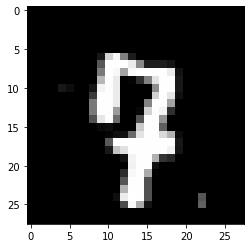

7


In [35]:
#visualize

def drawimg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawimg(xtrain[76])
print(ytrain[76])

In [46]:
#knn

def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,query_pt,k=5):
    n=x.shape[0]
    vals=[]
    
    #find dist of each row and store in the form of tuple
    for i in range(0,n):
        d=dist(query_pt,x[i])
        vals.append((d,y[i]))
    
    #array of tuples sorts on the basis of 1st parameter (here d)
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    
    #get value 0f y(2nd column) and find max occurence
    new_vals=np.unique(vals[:,1],return_counts=True)
    
    #get the ele which has max occurence
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [42]:
predictions=knn(xtrain,ytrain,xtest[84])

print(int(predictions))

(array([8.]), array([5], dtype=int64))
8


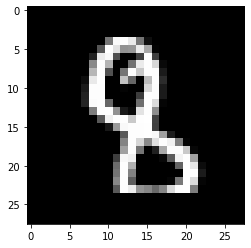

8


In [44]:
drawimg(xtest[84])
print(ytest[84])

In [49]:
pred=[]
for i in range(0,10):
    pred.append(knn(xtrain,ytrain,xtest[i]))

In [52]:
pred=np.array(pred)
print(pred)

[0. 7. 7. 2. 2. 6. 5. 7. 5. 5.]


In [58]:
print("no of correct results out of 10:",(pred==ytest[:10]).sum())

no of correct results out of 10: 9


In [56]:
print(ytest[:10])

[0 7 7 2 2 6 5 7 8 5]


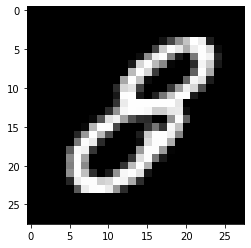

In [57]:
drawimg(xtest[8])